<a href="https://colab.research.google.com/github/Priyam023002/ROKO1845/blob/main/HAC_%26_DBSCAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

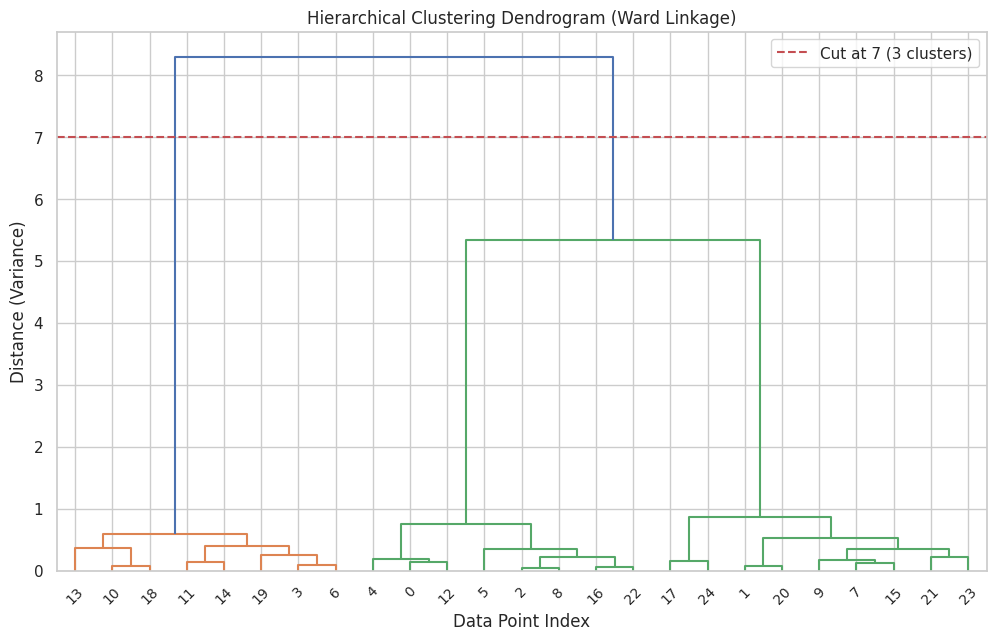

The dendrogram shows the history of merges. A cut at y=7 gives 3 clusters.


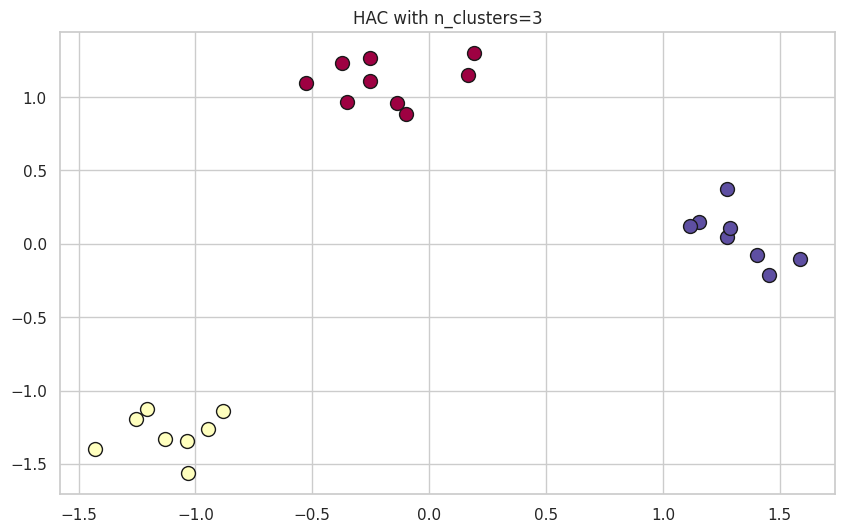

This shows the 3 clusters found by HAC (compare to dendrogram cut).


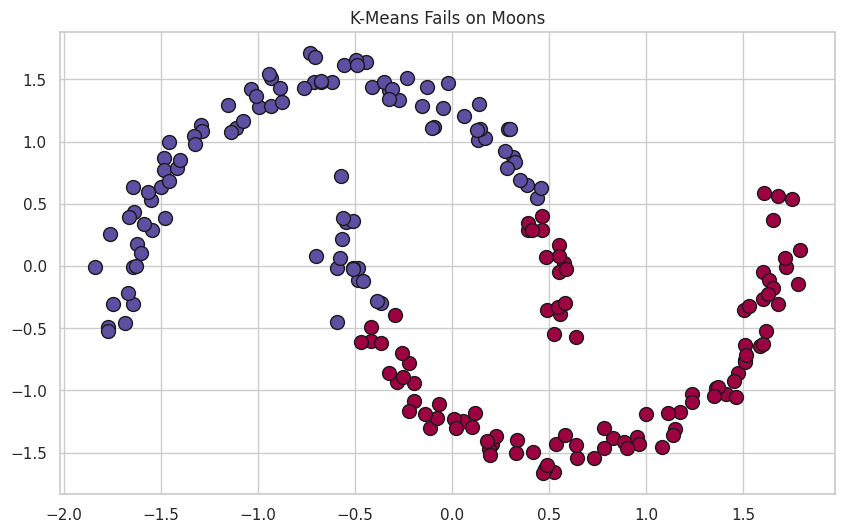

K-Means completely fails, as the clusters are not spherical.


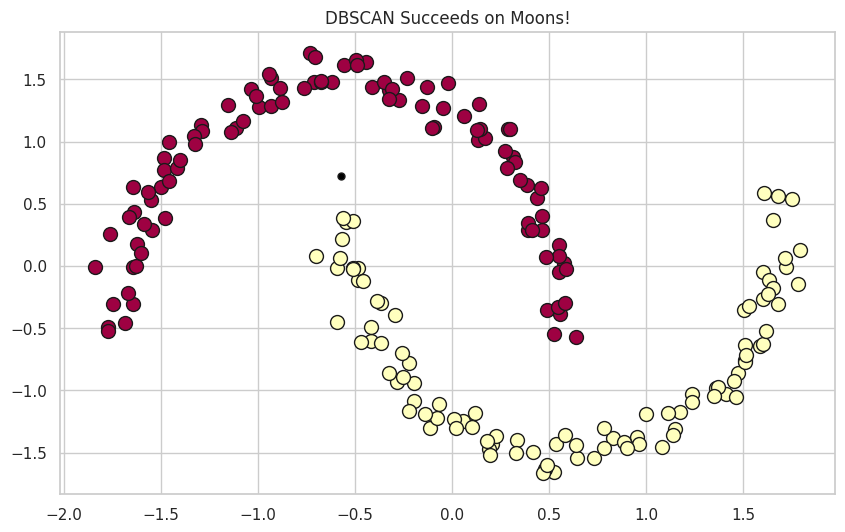

DBSCAN perfectly finds the two non-linear moon shapes.


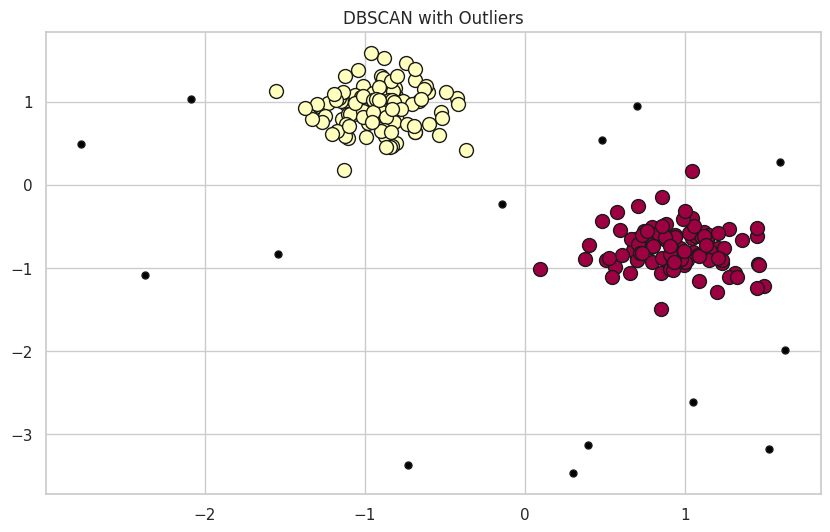

DBSCAN finds the two core clusters (0 and 1)
and correctly labels all the random outliers as 'Noise' (black, label -1).
This is a massive advantage over K-Means, which would have 'forced'
the outliers into one of the clusters, skewing the centroids.


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.datasets import make_moons, make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering, DBSCAN, KMeans
from scipy.cluster.hierarchy import dendrogram, linkage

# Set up plotting style
sns.set_theme(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

def plot_clusters(X, labels, title="Cluster Plot"):
    unique_labels = set(labels)
    colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))

    plt.figure(figsize=(10, 6))
    for k, col in zip(unique_labels, colors):
        if k == -1:
            # -1 is for "Noise" in DBSCAN
            col = 'black'

        class_member_mask = (labels == k)

        xy = X[class_member_mask]
        plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
                 markeredgecolor='k', markersize=10 if k != -1 else 5)

    plt.title(title)
    plt.show()

# --- Generate simple data for HAC ---
X_hac, y_hac = make_blobs(n_samples=25, centers=3, n_features=2, random_state=42)
X_hac = StandardScaler().fit_transform(X_hac)


# 'linkage' is the core function that does the hierarchical clustering
# 'ward' is the linkage method (minimizes variance)
Z = linkage(X_hac, method='ward')

plt.figure(figsize=(12, 7))
plt.title('Hierarchical Clustering Dendrogram (Ward Linkage)')
plt.xlabel('Data Point Index')
plt.ylabel('Distance (Variance)')
dendrogram(Z)
plt.axhline(y=7, color='r', linestyle='--', label='Cut at 7 (3 clusters)')
plt.legend()
plt.show()
print("The dendrogram shows the history of merges. A cut at y=7 gives 3 clusters.")


# If you already know you want 3 clusters, you can just tell the model
# It will perform the HAC process and cut the tree for you.
hac = AgglomerativeClustering(n_clusters=3, linkage='ward')
labels_hac = hac.fit_predict(X_hac)

plot_clusters(X_hac, labels_hac, "HAC with n_clusters=3")
print("This shows the 3 clusters found by HAC (compare to dendrogram cut).")


# Generate data where K-Means fails
X_moons, y_moons = make_moons(n_samples=200, noise=0.05, random_state=42)
X_moons = StandardScaler().fit_transform(X_moons)

# Let's first show how K-Means fails
kmeans = KMeans(n_clusters=2, n_init=10, random_state=42)
labels_kmeans = kmeans.fit_predict(X_moons)
plot_clusters(X_moons, labels_kmeans, "K-Means Fails on Moons")
print("K-Means completely fails, as the clusters are not spherical.")

# Now, let's use DBSCAN
# After some tuning, eps=0.3 is a good choice
dbscan = DBSCAN(eps=0.3, min_samples=5)
labels_dbscan = dbscan.fit_predict(X_moons)

plot_clusters(X_moons, labels_dbscan, "DBSCAN Succeeds on Moons!")
print("DBSCAN perfectly finds the two non-linear moon shapes.")

# Create blobs with some far-flung outliers
X_blobs, y_blobs = make_blobs(n_samples=200, centers=2, cluster_std=1.0, random_state=42)
# Add 20 random, noisy points
outliers = np.random.uniform(low=-10, high=10, size=(20, 2))
X_noise = np.vstack([X_blobs, outliers])
X_noise = StandardScaler().fit_transform(X_noise)

# Run DBSCAN
dbscan_noise = DBSCAN(eps=0.5, min_samples=5)
labels_noise = dbscan_noise.fit_predict(X_noise)

plot_clusters(X_noise, labels_noise, "DBSCAN with Outliers")
print("DBSCAN finds the two core clusters (0 and 1)")
print("and correctly labels all the random outliers as 'Noise' (black, label -1).")
print("This is a massive advantage over K-Means, which would have 'forced'")
print("the outliers into one of the clusters, skewing the centroids.")

